In [1]:
#Importar librerias necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

eda.... buscar resumen

1. Acc_vel_loc_sinrangos

In [3]:
# Importar las hoja Acc_vel_loc_sinrangos
acc_vel_loc_sinrangos = pd.read_csv('Dataset_procesado/Acc_velocidad_loc_sinrangos.csv')

#Verificar informacion del dataset
print(acc_vel_loc_sinrangos.info()) 

# Se verifican de nuevo los valores nulos
print(acc_vel_loc_sinrangos.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3065 entries, 0 to 3064
Columns: 125 entries, Provincia to 10000 Mbps
dtypes: float64(121), int64(1), object(3)
memory usage: 2.9+ MB
None
Provincia     0
Partido       0
Localidad     0
Link Indec    0
Otros         0
             ..
999 Mbps      0
1000 Mbps     0
1024 Mbps     0
4000 Mbps     0
10000 Mbps    0
Length: 125, dtype: int64


In [4]:
print(acc_vel_loc_sinrangos.describe())

         Link Indec         Otros   0,256 Mbps      0,5 Mbps   0,512 Mbps  \
count  3.065000e+03   3065.000000  3065.000000   3065.000000  3065.000000   
mean   3.862774e+07    107.071126     0.034584      9.002284     0.359869   
std    3.001230e+07   1724.802263     0.696957    451.079743     2.092825   
min    0.000000e+00    -15.000000     0.000000      0.000000     0.000000   
25%    6.875025e+06      0.000000     0.000000      0.000000     0.000000   
50%    3.009803e+07      0.000000     0.000000      0.000000     0.000000   
75%    6.611903e+07      1.000000     0.000000      0.000000     0.000000   
max    9.401402e+07  87722.000000    31.000000  24968.000000    61.000000   

         0,75 Mbps       1 Mbps     1,5 Mbps       2 Mbps     2,2 Mbps  ...  \
count  3065.000000  3065.000000  3065.000000  3065.000000  3065.000000  ...   
mean      3.668189    18.959869     0.648613    22.403589     0.005873  ...   
std      37.817816   122.302572    21.750518   137.560321     0.32513

se puede resumir de estos resultados estadisticos que existe:
Dispersión de Datos: Las columnas como "1 Mbps" y "2 Mbps" muestran una alta dispersión de datos, lo que significa que hay localidades con una gran cantidad de accesos, mientras que otras tienen muy pocos o ninguno.
Preponderancia de Valores Bajos: Muchas de las velocidades tienen medias muy bajas y percentiles (25%, 50%, 75%) cercanos a 0, lo que sugiere que en la mayoría de las localidades no hay muchos accesos a estas velocidades, o que están concentrados en pocas localidades.

Ahora procedo a realizar graficas y se creara una lista de las columnas variadas de velocidades

In [5]:

# Lista original de columnas que contienen "Mbps"
velocidad_cols = [col for col in acc_vel_loc_sinrangos.columns if 'Mbps' in col]

# Imprimir los nombres de las columnas antes de la conversión
print("Columnas originales:", velocidad_cols)

# Función para limpiar y convertir los nombres de las columnas a números
def convertir_velocidad(col):
    try:
        return float(col.replace('Mbps', '').replace(',', '.'))
    except ValueError:
        return col

# Aplicar la función a los nombres de las columnas que contienen "Mbps"
solo_veloc= [convertir_velocidad(col) for col in velocidad_cols]

# Imprimir los nuevos nombres para verificar
print("Nuevos nombres de columnas:", solo_veloc)

# Reemplazar los nombres de las columnas en el DataFrame original
# Asegúrate de que la cantidad de columnas coincida
acc_vel_loc_sinrangos.rename(columns=dict(zip(velocidad_cols, solo_veloc)), inplace=True)


Columnas originales: ['0,256 Mbps', '0,5 Mbps', '0,512 Mbps', '0,75 Mbps', '1 Mbps', '1,5 Mbps', '2 Mbps', '2,2 Mbps', '2,5 Mbps', '3 Mbps', '3,3 Mbps', '3,5 Mbps', '4 Mbps', '4,5 Mbps', '5 Mbps', '6 Mbps', '6,4 Mbps', '7 Mbps', '7,5 Mbps', '8 Mbps', '9 Mbps', '10 Mbps', '10,1 Mbps', '10,2 Mbps', '11 Mbps', '12 Mbps', '12,3 Mbps', '13 Mbps', '14 Mbps', '15 Mbps', '16 Mbps', '17 Mbps', '18 Mbps', '20 Mbps', '20,5 Mbps', '21 Mbps', '22 Mbps', '23 Mbps', '24 Mbps', '25 Mbps', '25,1 Mbps', '25,5 Mbps', '26 Mbps', '27 Mbps', '30 Mbps', '31 Mbps', '32 Mbps', '35 Mbps', '36 Mbps', '40 Mbps', '41 Mbps', '45 Mbps', '48 Mbps', '49 Mbps', '50 Mbps', '50,1 Mbps', '50,25 Mbps', '51 Mbps', '55 Mbps', '59 Mbps', '60 Mbps', '61 Mbps', '65 Mbps', '66 Mbps', '70 Mbps', '75 Mbps', '80 Mbps', '85 Mbps', '90 Mbps', '95 Mbps', '98 Mbps', '100 Mbps', '100,1 Mbps', '100,25 Mbps', '105 Mbps', '110 Mbps', '120 Mbps', '122 Mbps', '125 Mbps', '130 Mbps', '140 Mbps', '150 Mbps', '155 Mbps', '160 Mbps', '164 Mbps',

Se aplica la función convertir_velocidad solo a las columnas que contienen velocidades, y luego asigna esos nombres convertidos al DataFrame original.

In [6]:
# Función para filtrar columnas con una alta proporción de valores atípicos
def filtrar_columnas_atipicas(df, columnas, umbral=0.05):
    columnas_atipicas = []
    for col in columnas:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        limites_inferiores = q1 - 1.5 * iqr
        limites_superiores = q3 + 1.5 * iqr
        atipicos = df[col].lt(limites_inferiores) | df[col].gt(limites_superiores)
        if atipicos.mean() > umbral:
            columnas_atipicas.append(col)
    return columnas_atipicas

# Aplicar la función
columnas_atipicas = filtrar_columnas_atipicas(acc_vel_loc_sinrangos, solo_veloc, umbral=0.05)
print("Columnas con valores atípicos relevantes:", columnas_atipicas)


Columnas con valores atípicos relevantes: [0.5, 0.512, 0.75, 1.0, 2.0, 3.0, 3.5, 4.0, 5.0, 6.0, 7.0, 8.0, 10.0, 12.0, 15.0, 20.0, 25.0, 30.0, 50.0, 60.0, 75.0, 100.0, 150.0, 300.0, 500.0, 600.0, 1000.0]


Se debe identificar aquellas con una alta cantidad de valores atípicos o con una variabilidad significativa. se aplicara un umbral para seleccionar solo las columnas con una proporción significativa de valores atípicos.

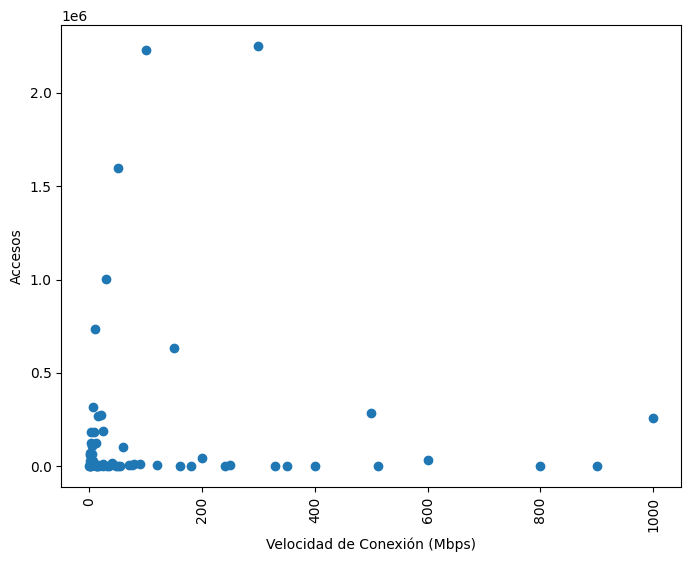

In [7]:
# Filtrar las columnas que contienen las velocidades
columnas_velocidad = [col for col in acc_vel_loc_sinrangos.columns if isinstance(col, (float, int))]

# Sumar las columnas de velocidad
df_sum = acc_vel_loc_sinrangos[columnas_velocidad].sum()

# Filtrar velocidades con más de 100 accesos
df_filtered = df_sum[df_sum > 100]

# Graficar los resultados
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered.index, df_filtered.values)
plt.xlabel('Velocidad de Conexión (Mbps)')
plt.ylabel('Accesos')
plt.xticks(rotation=90)
plt.show()

El gráfico es un diagrama de dispersión que muestra la relación entre diferentes velocidades de conexión de internet (en Mbps) y el número de accesos para cada velocidad. Los puntos en el gráfico indican la cantidad de accesos para cada velocidad de conexión. La mayoría de los puntos están concentrados en la parte baja del gráfico, lo que sugiere que las velocidades de conexión más utilizadas tienen un número relativamente bajo de accesos. Hay algunos valores atípicos (outliers) que se encuentran más arriba, indicando velocidades con un número significativamente mayor de accesos.

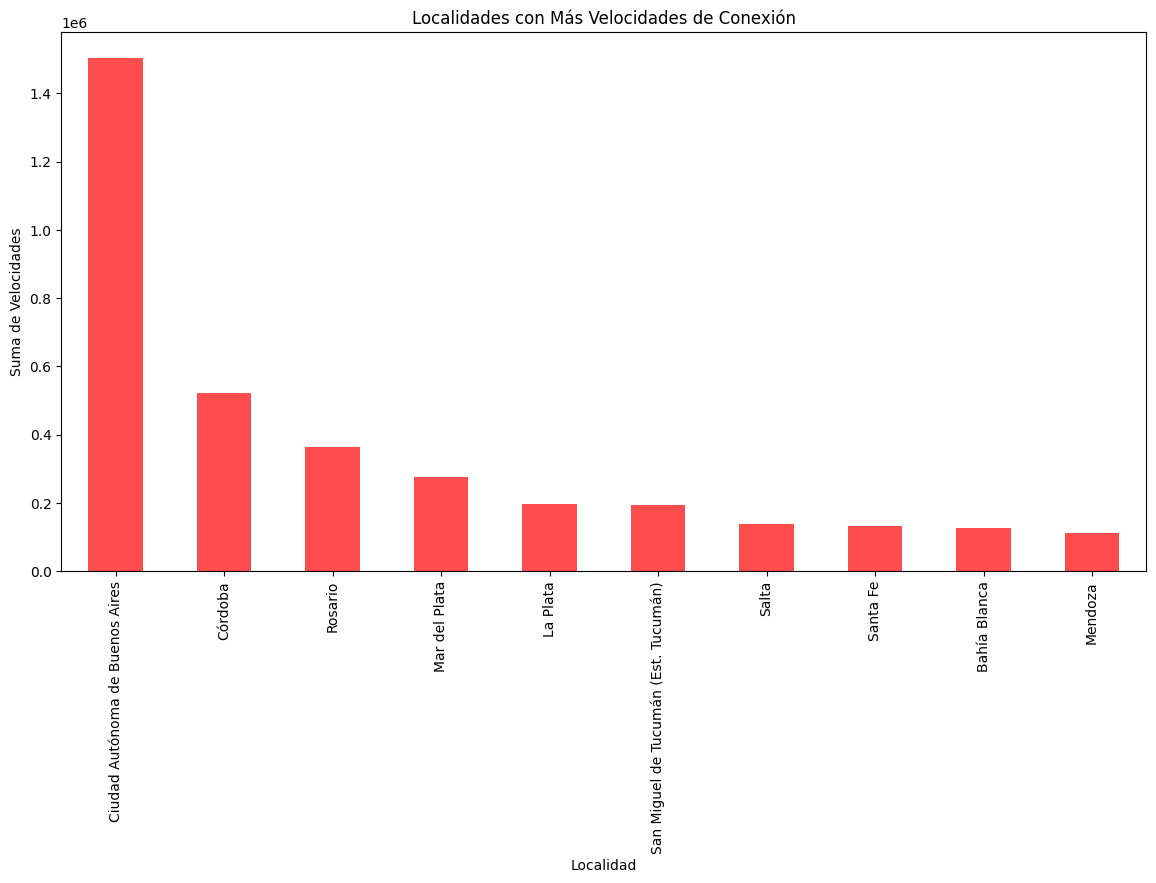

In [8]:
# Calcular la suma o media de velocidades por localidad
localidades = acc_vel_loc_sinrangos.groupby('Localidad')[columnas_velocidad].sum()

# Identificar las localidades con  mayores sumas
localidades_mayores = localidades.sum(axis=1).nlargest(10)

# Graficar las localidades con mayores velocidades
plt.figure(figsize=(14, 7))
localidades_mayores.plot(kind='bar', color='red', alpha=0.7)
plt.title('Localidades con Más Velocidades de Conexión')
plt.xlabel('Localidad')
plt.ylabel('Suma de Velocidades')
plt.xticks(rotation=90)
plt.show()

In [9]:
# Verificar qué columnas tienen valores en 0
columnas_con_valores_cero = acc_vel_loc_sinrangos[columnas_velocidad].eq(0).sum()
#columnas_con_valores_cero = columnas_con_valores_cero[columnas_con_valores_cero > 0]

print("Columnas con valores en 0 en al menos una localidad:")
print(columnas_con_valores_cero)

Columnas con valores en 0 en al menos una localidad:
0.256        3029
0.500        2424
0.512        2540
0.750        2781
1.000        2194
             ... 
999.000      3048
1000.000     2645
1024.000     3063
4000.000     3064
10000.000    3063
Length: 120, dtype: int64


In [10]:
# Localidades con al menos un valor de velocidad en 0
localidades_con_cero = acc_vel_loc_sinrangos[acc_vel_loc_sinrangos[columnas_velocidad].eq(0).any(axis=1)]

print("Localidades con al menos una velocidad en 0:")
print(localidades_con_cero)



Localidades con al menos una velocidad en 0:
         Provincia      Partido                           Localidad  \
0     BUENOS AIRES   25 de Mayo                          25 de Mayo   
1     BUENOS AIRES   25 de Mayo                     Agustín Mosconi   
2     BUENOS AIRES   25 de Mayo                           Del Valle   
3     BUENOS AIRES   25 de Mayo                           Ernestina   
4     BUENOS AIRES   25 de Mayo                   Gobernador Ugarte   
...            ...          ...                                 ...   
3060       TUCUMAN   Tafí Viejo  Villa Mariano Moreno - El Colmenar   
3061       TUCUMAN      Trancas                San Pedro de Colalao   
3062       TUCUMAN      Trancas                   Villa  de Trancas   
3063       TUCUMAN  Yerba Buena                       Villa Carmela   
3064       TUCUMAN  Yerba Buena            Yerba Buena - Marcos Paz   

      Link Indec  Otros  0.256  0.5  0.512  0.75   1.0  ...  680.0  700.0  \
0        6854100    0.0  

In [ ]:
# Definir los rangos
bins = [0, 1, 5, 10, 25, 50, 100, 500, 1024, 4000, 10000]
labels = ['0-1 Mbps', '1-5 Mbps', '5-10 Mbps', '10-25 Mbps', '25-50 Mbps', '50-100 Mbps', '100-500 Mbps', '500-1000 Mbps', '1000-5000 Mbps', '5000-10000 Mbps']

# Convertir las velocidades a categorías
for col in solo_veloc:
    if acc_vel_loc_sinrangos[col].dtype in [np.float64, np.float32]:
        # Asegurarse de que `col` sea de tipo string al concatenar
        acc_vel_loc_sinrangos[str(col) + '_rango'] = pd.cut(acc_vel_loc_sinrangos[col], bins=bins, labels=labels)

# Contar el número de valores por rango
conteo_rangos = acc_vel_loc_sinrangos.filter(like='_rango').apply(pd.Series.value_counts)
print("Conteo por rango de velocidades:\n", conteo_rangos)



In [ ]:
# Crear un boxplot para cada rango
plt.figure(figsize=(20, 10))
conteo_rangos.T.plot(kind='box', figsize=(20, 10), grid=True)
plt.title("Distribución de velocidades por rango (Boxplot)")
plt.xlabel("Rangos de Velocidad")
plt.ylabel("Conteo de Velocidades")
plt.show()



Distribución Concentrada en Velocidades Bajas: Los accesos están más concentrados en los rangos de velocidades bajas, como 0-1 Mbps y 1-5 Mbps. Esto se puede observar porque los cuadros de estos rangos tienen más puntos, indicando una mayor densidad de datos.

Presencia de Valores Atípicos: En cada rango de velocidad hay varios valores atípicos (outliers), representados por puntos fuera de los bigotes del boxplot. Estos indican que, aunque la mayoría de los accesos se encuentra en un rango específico, hay casos aislados donde el número de accesos es significativamente mayor o menor.

Asimetría en los Rangos Altos: En los rangos de velocidades más altas (por ejemplo, 100-500 Mbps y superiores), los boxplots muestran una mayor dispersión y asimetría, lo que sugiere que, aunque hay menos accesos en general, la variabilidad dentro de estos accesos es mayor.

Mediana Baja en Todos los Rangos: La mediana (línea en el centro de cada caja) es bastante baja en todos los rangos, lo que indica que la mayoría de los accesos se encuentra en valores bajos incluso dentro de cada rango de velocidad.

Varianza Creciente con la Velocidad: A medida que aumenta la velocidad, la varianza de los datos parece aumentar, como se puede observar en el aumento del tamaño de las cajas y la distancia de los bigotes. Esto podría sugerir que los accesos en velocidades más altas no son uniformes y varían más ampliamente.

2. Accesos_tecnologia_localidad

In [ ]:
# Importar el csv
acc_tecnol_local = pd.read_csv('Dataset_procesado/Accesos_tecnologia_localidades.csv')

In [ ]:
#Verificar informacion del dataset
print(acc_tecnol_local.info()) 

Se puede observar que este dataframe tiene datos de 3073 localidades o registros únicos con 13 columnas en total. ste DataFrame parece contener datos sobre la disponibilidad de diferentes tipos de tecnologías de acceso a internet en diversas localidades (provincia, partido, localidad). Cada tipo de acceso a internet (ADSL, CABLEMODEM, FIBRA ÓPTICA, etc.) está cuantificado por el número de conexiones en cada localidad. La columna Total general probablemente sea la suma de todas las conexiones de diferentes tipos para cada localidad.

In [ ]:
print(acc_tecnol_local.describe())

rsumir mean (media):
Representa el valor promedio para cada columna. Por ejemplo, la media de la columna "0,256 Mbps" es 0.034584, lo que indica que, en promedio, las localidades tienen aproximadamente 0.03 accesos en ese rango de velocidad.

std (desviación estándar):
Mide la dispersión de los datos respecto a la media. Un valor alto indica que los datos están más dispersos. Por ejemplo, la desviación estándar de "CABLEMODEM" es 122.302572, lo que indica una gran variabilidad en el número de accesos por esta tecnología entre las localidades.

min (mínimo):
Indica el valor más bajo registrado en cada columna. Por ejemplo, "CABLEMODEM" tiene un valor mínimo de 0, lo que sugiere que hay localidades sin accesos de este tipo.

25% (primer cuartil):
El 25% de las localidades tiene un número de accesos menor o igual a este valor. Por ejemplo, el 25% de las localidades tiene 0 accesos en "0,5 Mbps".

50% (mediana):
La mediana es el valor central, donde el 50% de las localidades tiene un número de accesos menor o igual a este valor. Es una buena medida del "valor típico" cuando los datos están sesgados.

75% (tercer cuartil):
El 75% de las localidades tiene un número de accesos menor o igual a este valor. Por ejemplo, el 75% de las localidades tiene menos de 1 acceso en "0,75 Mbps".

max (máximo):
Indica el valor más alto registrado en cada columna. Por ejemplo, la columna "CABLEMODEM" tiene un máximo de 4111, lo que significa que la localidad con más accesos por Cablemodem tiene 4111 accesos.

Interpretación General:
Distribución de Datos: La mayoría de los valores de acceso en diferentes tecnologías y rangos de velocidad están concentrados cerca de 0, lo que sugiere que en muchas localidades hay pocos o ningún acceso en ciertos rangos o tecnologías.
Desviación Estándar Alta: En columnas como "CABLEMODEM" o "1 Mbps", la desviación estándar alta indica que hay localidades con un número significativamente mayor de accesos que otras.
Outliers Potenciales: Los valores máximos en varias columnas son mucho más grandes que la media, lo que sugiere la presencia de valores atípicos o outliers. Por ejemplo, en "700 Mbps", el máximo es 68405, mientras que la media es solo 0.001305, lo que sugiere que una localidad tiene un número extremadamente alto de accesos en este rango de velocidad.
.


Gráfico de barras: Para cada columna categórica (Provincia, Partido, Localidad), muestra la frecuencia de cada categoría.

In [ ]:
# Crear un DataFrame con las tecnologías de acceso a Internet
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']


# Filtrar el DataFrame para seleccionar las localidades con mayores y menores conexiones totales
acc_tecnol_local['TotalConexiones'] = acc_tecnol_local[tecnologias].sum(axis=1)
localidades_mayores = acc_tecnol_local.groupby('Localidad')['TotalConexiones'].sum().nlargest(5).index
localidades_menores = acc_tecnol_local.groupby('Localidad')['TotalConexiones'].sum().nsmallest(5).index

# Crear un DataFrame con solo las localidades seleccionadas
df_filtrado = acc_tecnol_local[acc_tecnol_local['Localidad'].isin(localidades_mayores) | acc_tecnol_local['Localidad'].isin(localidades_menores)]

# Agrupar por localidad y sumar las conexiones por tecnología
df_tecnologias_filtrado = df_filtrado.groupby('Localidad')[tecnologias].sum()

# Crear el gráfico de barras apiladas
df_tecnologias_filtrado.plot(kind='bar', stacked=True, figsize=(15, 7))
plt.title('Distribución de Tipos de Conexión por Localidad (Localidades Seleccionadas)')
plt.xlabel('Localidad')
plt.ylabel('Número de Conexiones')
plt.legend(title='Tecnología')
plt.show()


En la localidad de Ciudad Autónoma de Buenos Aires (CABA), las conexiones por CABLEMODEM son claramente predominantes, representando una gran parte de todas las conexiones.
En localidades como Rosario y Mar del Plata, también se observa un número significativo de conexiones por CABLEMODEM, seguido de FIBRA ÓPTICA y otras tecnologías.
Diversidad de Tecnologías:

Se puede notar que en localidades como Córdoba, Rosario, y Mar del Plata hay una mayor diversidad en el uso de tecnologías, con conexiones repartidas entre CABLEMODEM, FIBRA ÓPTICA, ADSL, y otras.
En contraste, en localidades más pequeñas o con menos datos, como Bajada del Agrio, Bauer y Sigel, y Las Petacas, las conexiones son menos numerosas y están distribuidas en pocas tecnologías, principalmente CABLEMODEM y ADSL.
Presencia de Tecnologías Menos Comunes:

Tecnologías como DIAL UP, SATELITAL, WIMAX, y WIRELESS tienen una presencia muy limitada, y sólo parecen ser utilizadas en una pequeña cantidad de localidades o en números muy reducidos.



Observando el gráfico de barras apiladas que has generado, se pueden hacer algunas observaciones preliminares sobre la distribución de los tipos de conexión por localidad:

Predominio de Conexiones por Tecnología:

En la localidad de Ciudad Autónoma de Buenos Aires (CABA), las conexiones por CABLEMODEM son claramente predominantes, representando una gran parte de todas las conexiones.
En localidades como Rosario y Mar del Plata, también se observa un número significativo de conexiones por CABLEMODEM, seguido de FIBRA ÓPTICA y otras tecnologías.
Diversidad de Tecnologías:

Se puede notar que en localidades como Córdoba, Rosario, y Mar del Plata hay una mayor diversidad en el uso de tecnologías, con conexiones repartidas entre CABLEMODEM, FIBRA ÓPTICA, ADSL, y otras.
En contraste, en localidades más pequeñas o con menos datos, como Bajada del Agrio, Bauer y Sigel, y Las Petacas, las conexiones son menos numerosas y están distribuidas en pocas tecnologías, principalmente CABLEMODEM y ADSL.
Presencia de Tecnologías Menos Comunes:

Tecnologías como DIAL UP, SATELITAL, WIMAX, y WIRELESS tienen una presencia muy limitada, y sólo parecen ser utilizadas en una pequeña cantidad de localidades o en números muy reducidos.

Resumen:
Este gráfico sugiere que las localidades más grandes, como CABA, Rosario, y Córdoba, tienen una mayor cantidad y diversidad de conexiones a internet, con un predominio de tecnologías más modernas y de alta capacidad como CABLEMODEM y FIBRA ÓPTICA. Las localidades más pequeñas tienen un menor número de conexiones y dependen más de tecnologías tradicionales como ADSL. Además, algunas tecnologías menos comunes tienen una presencia muy limitada.

In [ ]:
# Melt the DataFrame to have a long format DataFrame for easier plotting
df_melted = acc_tecnol_local.melt(id_vars=['Provincia', 'Partido', 'Localidad'], value_vars=tecnologias, var_name='Tecnologia', value_name='Conexiones')

# Crear el boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Tecnologia', y='Conexiones', data=df_melted)
plt.title('Comparación de Tecnologías de Internet')
plt.xlabel('Tecnología')
plt.ylabel('Número de Conexiones')
plt.show()


Este análisis sugiere que, aunque existen tecnologías de Internet más tradicionales como ADSL y CABLEMODEM, la Fibra Óptica está ganando terreno, reflejando una tendencia hacia la modernización de la infraestructura de Internet en las provincias. Las diferencias en la distribución de conexiones entre tecnologías también podrían indicar variaciones en la infraestructura tecnológica y el acceso a Internet entre las diferentes regiones.

Valores Atípicos (Puntos Fuera de los Bigotes):

Varios de los boxplots, como los de ADSL, FIBRA OPTICA, y CABLEMODEM, muestran valores atípicos (outliers), lo que sugiere que en algunas provincias hay un número de conexiones significativamente diferente (mucho mayor) al de otras.
Estos outliers podrían indicar provincias con una infraestructura más desarrollada o áreas urbanas con una alta concentración de conexiones.

In [ ]:
# Suponiendo que ya tienes el DataFrame cargado en df
tecnologias = ['ADSL', 'CABLEMODEM', 'DIAL UP', 'FIBRA OPTICA', 'OTROS', 'SATELITAL', 'WIMAX', 'WIRELESS']

# Paso 2: Calcular la Matriz de Correlación
corr_matrix = acc_tecnol_local[tecnologias].corr()

# Paso 3: Crear el Heatmap de Correlación
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlación entre los Diferentes Tipos de Conexión')
plt.show()


buscar resumen

Por Provincia:
3. Accesos por velocidad

In [ ]:
# Importar el csv
accesos_por_velocidad = pd.read_csv('Dataset_procesado/Accesos_velocidad_Provincia.csv')

In [ ]:
#Verificar informacion del dataset
print(accesos_por_velocidad.info()) 

Este dataset posee 984 filas y un total de 12 columnas

Datos Completos: No hay valores nulos en el dataset, lo que es positivo para el análisis ya que no se requiere imputación de datos o eliminación de filas/columnas con valores faltantes.

Tipos de Datos Adecuados: Los tipos de datos parecen estar bien definidos para cada columna, con las columnas numéricas en float64 o int64, y la columna de texto en object.

Preparación para el Análisis: El dataset está bien estructurado y listo para análisis posteriores, como la generación de estadísticas descriptivas, visualización de datos, o la construcción de modelos predictivos.

 Distribución de la Velocidad de Internet

In [ ]:

plt.hist(accesos_por_velocidad['HASTA 512 kbps'], bins=30, alpha=0.5, label='HASTA 512 kbps')
plt.hist(accesos_por_velocidad['+ 512 Kbps - 1 Mbps'], bins=30, alpha=0.5, label='+ 512 Kbps - 1 Mbps')
plt.xlabel('Número de conexiones')
plt.ylabel('Frecuencia')
plt.title('Distribución de Velocidades de Internet')
plt.legend(loc='upper right')
plt.show()


buscar resumen 

Tendencias Temporales

In [ ]:

accesos_por_velocidad['Fecha'] = accesos_por_velocidad['Año'].astype(str) + '-' + accesos_por_velocidad['Trimestre'].astype(str)
accesos_por_velocidad['Fecha'] = pd.to_datetime(accesos_por_velocidad['Fecha'] + '-1', format='%Y-%m-%d')

plt.figure(figsize=(12, 8))
sns.lineplot(x='Fecha', y='HASTA 512 kbps', data=accesos_por_velocidad, label='HASTA 512 kbps')
sns.lineplot(x='Fecha', y='+ 512 Kbps - 1 Mbps', data=accesos_por_velocidad, label='+ 512 Kbps - 1 Mbps')
# Agregar más líneas según sea necesario
plt.xlabel('Fecha')
plt.ylabel('Número de conexiones')
plt.title('Tendencias de Velocidades de Internet a lo Largo del Tiempo')
plt.legend()
plt.show()


buscar resumen

Análisis de Tendencias en Outliers

In [ ]:
sns.lmplot(x='Total', y='HASTA 512 kbps', data=accesos_por_velocidad, aspect=2, height=6)
plt.xlabel('Total de Conexiones')
plt.ylabel('Número de conexiones hasta 512 kbps')
plt.title('Tendencia entre Total de Conexiones y Velocidades de Internet')
plt.show()

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=accesos_por_velocidad[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']])
plt.xticks(rotation=45)
plt.title('Outliers en las Velocidades de Internet')
plt.show()

Comparacion de dos provincias elegir 

In [ ]:
df_provincia1 = df[df['Provincia'] == 'Provincia A']
df_provincia2 = df[df['Provincia'] == 'Provincia B']

plt.scatter(df_provincia1['Año'], df_provincia1['HASTA 512 kbps'], color='blue', label='Provincia A')
plt.scatter(df_provincia2['Año'], df_provincia2['HASTA 512 kbps'], color='red', label='Provincia B')
plt.xlabel('Año')
plt.ylabel('Número de conexiones hasta 512 kbps')
plt.title('Comparación de Velocidades de Internet entre Provincias')
plt.legend()
plt.show()


In [ ]:
Relación entre Variables

In [ ]:

corr = accesos_por_velocidad[['HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps', '+ 6 Mbps - 10 Mbps', '+ 10 Mbps - 20 Mbps', '+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones entre Categorías de Velocidad')
plt.show()

resumen 

Por Provincia:
4. Accesos Por Tecnología

In [ ]:
# Importar las hoja Acc_vel_loc_sinrangos
acc_vel_tecnologia = pd.read_csv('Dataset_procesado/Accesos_Tecnología_Provincia.csv')

In [ ]:
#Verificar informacion del dataset
print(acc_vel_tecnologia.info()) 


buscar resumen

In [ ]:
print(acc_vel_tecnologia.describe()) 

buscar resumen de describe

Distribución de Tipos de Acceso
Gráfico de barras apiladas:

Objetivo: Ver la distribución de cada tipo de acceso (ADSL, Cablemodem, Fibra óptica, Wireless, Otros) a nivel general.

In [ ]:

# Sumar el total por tecnología
tecnologia_totales = acc_vel_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

# Crear gráfico de barras
tecnologia_totales.plot(kind='bar', figsize=(10, 6), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.xlabel('Tipo de Tecnología')
plt.ylabel('Número de Conexiones')
plt.title('Distribución de Tipos de Acceso a Internet')
plt.xticks(rotation=45)
plt.show()


resumen

Tendencias Temporales de Cada Tecnología
Gráfico de líneas:

Objetivo: Ver cómo cambian los números de conexiones para cada tecnología a lo largo del tiempo.


Comparación Regional de Tecnologías

In [ ]:
df_provincia = acc_vel_tecnologia.groupby('Provincia').sum()

df_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].plot(kind='bar', stacked=True, figsize=(14, 8))
plt.xlabel('Provincia')
plt.ylabel('Número de Conexiones')
plt.title('Comparación de Tecnologías de Internet por Provincia')
plt.xticks(rotation=45)
plt.legend(title='Tecnología')
plt.show()


resumen

Proporción de Tecnologías por una Provincia en particular

In [ ]:
provincia = 'Buenos Aires'  # Cambia por la provincia que te interese
df_provincia = acc_vel_tecnologia[acc_vel_tecnologia['Provincia'] == provincia]

total_tecnologias = df_provincia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].sum()

plt.pie(total_tecnologias, labels=total_tecnologias.index, autopct='%1.1f%%', colors=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title(f'Proporción de Tecnologías de Internet en {provincia}')
plt.show()


se observa el pocentaje ....

Análisis de Outliers

In [ ]:
# Función para identificar outliers usando IQR
def find_outliers_iqr(df):
    outliers_dict = {}
    for col in ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identificar outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers_dict[col] = outliers
    
    return outliers_dict

# Obtener outliers
outliers_iqr = find_outliers_iqr(acc_vel_tecnologia)

# Mostrar resultados
for tech, outliers in outliers_iqr.items():
    print(f"Outliers en {tech}:")
    print(outliers)

Valores Extremos: Los outliers en la columna ADSL tienen valores notablemente más altos que el resto de los datos. Por ejemplo, los valores de ADSL como 1,567,685 en Buenos Aires y 445,569 en Capital Federal son considerablemente mayores en comparación con otros registros.
Distribución Geográfica: Los outliers se encuentran en varias provincias, pero algunos lugares como Buenos Aires y Santa Fe tienen varios registros atípicos. Esto podría indicar una alta demanda o un error en la recopilación de datos.
2. Temporalidad
Fechas Recurrentes: Los outliers parecen estar concentrados en ciertos años y trimestres, como 2014, lo que podría sugerir un evento o una anomalía en esos períodos. Este patrón debe ser revisado para entender si hay un factor específico que causó estos valores extremos.
3. Comparación con Otros Servicios
Discrepancias en Servicios: Los valores altos en ADSL a menudo coinciden con valores elevados en otras categorías como Cablemodem y Fibra óptica. Esto puede indicar que los outliers no son errores aislados sino que están relacionados con una alta demanda en general.

In [ ]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=acc_vel_tecnologia[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']])
plt.xticks(rotation=45)
plt.title('Distribución de Tecnologías de Internet')
plt.show()


resumen de outlayers

ojoooo buscar bien un grafico para representar el año inconsistente con las tecnologia

In [ ]:
# Verifica que las columnas existan y que no haya valores inesperados
print(acc_vel_tecnologia.columns)
print(acc_vel_tecnologia[['Año', 'Trimestre', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].head())


In [ ]:
# Filtrar las filas que tengan valores NaN en las tecnologías
df_inconsistente = acc_vel_tecnologia[acc_vel_tecnologia['Año_inconsistente']].copy()

# Llenar NaNs o remover filas con NaN en las columnas de tecnologías
df_inconsistente[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']] = df_inconsistente[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']].fillna(0)

# Usar melt para transformar las columnas de tecnologías en formato largo
df_melted = df_inconsistente.melt(id_vars=['Año', 'Trimestre'], 
                                  value_vars=['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros'],
                                  var_name='Tecnologia', 
                                  value_name='Valor')

# Filtrar las filas donde las tecnologías tienen valores significativos (por ejemplo, no NaN)
df_melted = df_melted[df_melted['Valor'] != 0]


In [ ]:


# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear gráfico de líneas para cada tecnología
sns.lineplot(x='Trimestre', y='Año', hue='Tecnologia', marker='o', data=df_melted)

# Etiquetas y título
plt.title('Años Inconsistentes por Tecnología')
plt.xlabel('Trimestre')
plt.ylabel('Año Inconsistente')

# Mostrar gráfico
plt.show()



5. Penetración-poblacion

In [ ]:
# Importar las hoja Acc_vel_loc_sinrangos
poblacion = pd.read_csv('Dataset_procesado/Penetración_poblacion.csv')

In [ ]:
print(poblacion.info())

In [ ]:
# Estadísticas descriptivas
print(poblacion.describe(include='all'))

Distribución Temporal: Los datos abarcan desde 2014 hasta 2024, con un promedio de 2018.6, lo que sugiere que los datos están distribuidos a lo largo de varios años y no se concentran en un período específico.

Distribución Trimestral: La variable trimestre muestra una distribución relativamente uniforme, aunque con una ligera inclinación hacia el segundo y tercer trimestre.

Diversidad Regional: Se observan 24 provincias, con Buenos Aires siendo la provincia más frecuentemente reportada en el dataset. Esto podría indicar una mayor densidad de datos para esta provincia en comparación con otras.

Accesos por Habitantes: Hay una amplia gama en los accesos por cada 100 habitantes, con una mediana de 13.57 y una desviación estándar significativa (9.21), lo que indica que hay provincias con niveles de acceso muy diferentes entre sí. El rango amplio sugiere variabilidad en la penetración de internet o servicios de telecomunicaciones a nivel regional.



Graficos:

Distribución de Accesos por Año
Un gráfico de líneas puede mostrar cómo ha cambiado la penetración de accesos por cada 100 habitantes a lo largo de los años.

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=poblacion, x='Año', y='Accesos por cada 100 hab', hue='Provincia', marker='o')
plt.title('Accesos por cada 100 habitantes a lo largo del tiempo')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hab')
plt.legend(loc='upper right')
plt.show()

resumen

Distribución de Accesos por Trimestre

Un gráfico de caja (boxplot) puede ser útil para visualizar la distribución de accesos en diferentes trimestres.

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=poblacion, x='Trimestre', y='Accesos por cada 100 hab')
plt.title('Distribución de accesos por cada 100 habitantes por trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hab')
plt.show()

resumen

Distribución de Accesos por Provincia

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=poblacion, x='Provincia', y='Accesos por cada 100 hab')
plt.title('Distribución de accesos por cada 100 habitantes por provincia')
plt.xlabel('Provincia')
plt.ylabel('Accesos por cada 100 hab')
plt.xticks(rotation=90)
plt.show()

resumen

Detección de Outliers

In [ ]:
# Calcular la mediana
median = poblacion['Accesos por cada 100 hab'].median()

# Calcular la desviación absoluta respecto a la mediana
mad = np.median(np.abs(poblacion['Accesos por cada 100 hab'] - median))

# Definir el umbral
threshold = 3 * mad

# Identificar outliers
outliers_mad = poblacion[np.abs(poblacion['Accesos por cada 100 hab'] - median) > threshold]

# Visualizar outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=poblacion, x='Accesos por cada 100 hab')
plt.title('Distribución de accesos por cada 100 habitantes con método MAD')
plt.show()

print(f'Número de outliers detectados con MAD: {len(outliers_mad)}')

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(poblacion['Accesos por cada 100 hab'], bins=30, kde=True)
plt.title('Distribución de accesos por cada 100 habitantes')
plt.xlabel('Accesos por cada 100 hab')
plt.ylabel('Frecuencia')
plt.show()

resumen

6. Penetración-hogares

In [ ]:
# Importar las hoja de penetracion hogares
hogares= pd.read_csv('Dataset_procesado/Penetración_hogares.csv')

In [ ]:
print(hogares.info())

resumen

In [ ]:
print(hogares.describe())

Análisis Descriptivo
Rango Temporal: Los datos abarcan desde 2014 hasta 2024, lo que representa una década de información.
Tendencia Central: La media (2018.63) y la mediana (2019) están bastante cerca, indicando una distribución relativamente simétrica. La desviación estándar de 2.96 sugiere que los datos están relativamente concentrados alrededor de la media.
Cuartiles: El rango intercuartílico (de 2016 a 2021) muestra que la mayoría de los datos se concentran en estos años, con menos frecuencia en años extremos (2014 y 2024).
Trimestre:

Distribución de Trimestres: Los valores varían de 1 a 4, representando los cuatro trimestres del año. La media es 2.46, lo que sugiere que, en promedio, los datos se distribuyen entre el primer y segundo trimestre.
Cuartiles: El primer cuartil (1) y el tercer cuartil (3) sugieren que hay una tendencia hacia los primeros y últimos trimestres, con menos datos en el segundo trimestre.
Accesos por cada 100 hogares:

Tendencia Central: La media (52.16) es mayor que la mediana (49.44), lo que sugiere que hay algunos valores altos que están sesgando la media hacia arriba.
Desviación Estándar: Con una desviación estándar de 24.04, hay una considerable variabilidad en el número de accesos.
Cuartiles: Los valores del primer cuartil (33.20) al tercer cuartil (65.71) muestran una amplia gama en los accesos, indicando una distribución desigual.

Distribución de los Años

In [ ]:
# Histograma del Año
plt.figure(figsize=(10, 6))
plt.hist(hogares['Año'], bins=range(int(hogares['Año'].min()), int(hogares['Año'].max()) + 1), edgecolor='black')
plt.title('Distribución de los Años')
plt.xlabel('Año')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

no se si dejar este grafico

Distribución de Accesos

In [ ]:
# Histograma de Accesos por cada 100 hogares
plt.figure(figsize=(10, 6))
plt.hist(hogares['Accesos por cada 100 hogares'], bins=30, edgecolor='black')
plt.title('Distribución de Accesos por cada 100 Hogares')
plt.xlabel('Accesos por cada 100 hogares')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


resumen

Boxplot del Año

In [ ]:
# Boxplot de Accesos por Año
plt.figure(figsize=(14, 8))
sns.boxplot(x='Año', y='Accesos por cada 100 hogares', data=hogares)
plt.title('Boxplot de Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Boxplot de Accesos por Trimestre
plt.figure(figsize=(14, 8))
sns.boxplot(x='Trimestre', y='Accesos por cada 100 hogares', data=hogares)
plt.title('Boxplot de Accesos por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()


In [ ]:
# Suponiendo que comparas 'Año' con 'Accesos por cada 100 hogares'
plt.figure(figsize=(10, 6))
plt.scatter(hogares['Año'], hogares['Accesos por cada 100 hogares'], alpha=0.5)
plt.title('Dispersión de Accesos por Año')
plt.xlabel('Año')
plt.ylabel('Accesos por cada 100 hogares')
plt.grid(True)
plt.show()

resumen

7. Velocidad % por prov

In [ ]:
# Importar las hoja Velocidad % por provincia 
velocidad = pd.read_csv('Dataset_procesado/Velocidad % por prov.csv')

In [ ]:
print(velocidad.info())

In [ ]:
print(velocidad.describe())

Crecimiento y Variabilidad: El análisis sugiere que, a lo largo de los años, la velocidad de internet ha mejorado, pero sigue habiendo una gran variabilidad. Es posible que algunas provincias tengan acceso a velocidades mucho mayores que otras, lo que puede reflejar diferencias en infraestructura o inversión.
Oportunidades de Mejora: La empresa podría enfocarse en reducir la disparidad en la velocidad de conexión para brindar un servicio más homogéneo a nivel nacional. Además, al observar el crecimiento de la velocidad a lo largo del tiempo, se podrían identificar tendencias que indiquen oportunidades de expansión en regiones con baja conectividad.

Año y Trimestre:

Año: El rango de años va de 2014 a 2024, con una media de 2018.63. La desviación estándar es de aproximadamente 2.96 años, lo que indica una variación regular en los años registrados.
Trimestre: Los trimestres están distribuidos de 1 a 4, con una media de 2.46 y una desviación estándar de 1.13, lo que sugiere que los datos están bien distribuidos a lo largo de los trimestres del año.
Mbps (Media de bajada):

Media: La media de velocidad de descarga es de 23.19 Mbps, lo que sugiere un nivel de conectividad aceptable en promedio a lo largo de los años.
Desviación Estándar: La desviación estándar es bastante alta (31.62 Mbps), indicando una gran variabilidad en las velocidades de descarga entre las diferentes provincias y/o trimestres.
Valores Extremos: La velocidad mínima registrada es de 2.57 Mbps, mientras que la máxima alcanza los 234.44 Mbps. Esta gran diferencia entre los valores mínimo y máximo podría indicar la presencia de áreas con infraestructuras de telecomunicaciones muy dispares.


Boxplot de Velocidad por Año y Trimestre:

In [ ]:
plt.figure(figsize=(14, 8))

# Boxplot para Año
plt.subplot(1, 2, 1)
sns.boxplot(x='Año', y='Mbps (Media de bajada)', data=velocidad)
plt.title('Boxplot de Velocidad por Año')
plt.xlabel('Año')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)
plt.xticks(rotation=45)

# Boxplot para Trimestre
plt.subplot(1, 2, 2)
sns.boxplot(x='Trimestre', y='Mbps (Media de bajada)', data=velocidad)
plt.title('Boxplot de Velocidad por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Mbps (Media de bajada)')
plt.grid(True)

plt.tight_layout()
plt.show()

resuen

Histograma de Velocidad de Internet:

Propósito: Evaluar la distribución general de las velocidades de internet.
Interpretación: Detectar si hay sesgo en la distribución (por ejemplo, más concentraciones de velocidades bajas o altas).

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(velocidad['Mbps (Media de bajada)'], kde=True, bins=30)
plt.title('Distribución de la Velocidad de Internet')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()


resumen

nota buscar otro grafico de este o descartar esta hoja

8. Ingresos

In [ ]:
# Importar las hoja Acc_vel_loc_sinrangos
ingresos = pd.read_csv('Dataset_procesado/Ingresos.csv')

In [ ]:
print(ingresos.info())

resumen

In [ ]:
print(ingresos.describe())

Resumen de Datos
Promedio de Ingresos Anuales: Los ingresos promedio son 38,850 millones de pesos.
Distribución Temporal:
Año Mínimo y Máximo: Los datos cubren desde 2014 hasta 2033, lo que indica proyecciones o datos erróneos en el futuro.
Ingresos Máximos y Mínimos: El valor máximo es 280,419 millones de pesos y el mínimo es 2,984 millones de pesos.
Variabilidad en los Ingresos: La desviación estándar es alta, lo que indica una gran variabilidad en los ingresos entre los distintos trimestres.


Gráfico de Líneas (Tendencia de Ingresos a lo Largo del Tiempo)

In [ ]:
import matplotlib.pyplot as plt

# Asegúrate de que la columna de fecha o año esté ordenada
df = ingresos.sort_values(by=['Año', 'Trimestre'])

plt.figure(figsize=(10, 6))
plt.plot(df['Año'].astype(str) + ' Q' + df['Trimestre'].astype(str), df['Ingresos (miles de pesos)'], marker='o')
plt.title('Tendencia de Ingresos a lo Largo del Tiempo')
plt.xlabel('Año - Trimestre')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


cambiar por otro parecido

Boxplot (Distribución de Ingresos por Año o Trimestre)

In [ ]:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Año', y='Ingresos (miles de pesos)', data=df)
plt.title('Distribución de Ingresos por Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.xticks(rotation=45)
plt.show()

resumen

Distribucion de Ingresos

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df['Ingresos (miles de pesos)'], bins=10, edgecolor='black')
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos (miles de pesos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

resumen

Diagrama de Dispersión (Ingresos vs. Año)

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Año'], df['Ingresos (miles de pesos)'])
plt.title('Ingresos vs. Año')
plt.xlabel('Año')
plt.ylabel('Ingresos (miles de pesos)')
plt.grid(True)
plt.show()

resumen

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Ingresos (miles de pesos)'])
plt.title('Boxplot de Ingresos (miles de pesos)')
plt.xlabel('Ingresos (miles de pesos)')
plt.show()